In [1]:
from __future__ import print_function
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Aadiluddin\OneDrive\Desktop\DV Final Project\Mohammed Aadiluddin Quamri_Dataset.csv")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  int64  
 1   StockCode    539150 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,559946.967325,9.552250,4.611114,15287.690570
std,13421.287454,218.081158,96.759853,1713.600303
min,536365.000000,-80995.000000,-11062.060000,12346.000000
25%,547896.000000,1.000000,1.250000,13953.000000
50%,560601.000000,3.000000,2.080000,15152.000000
75%,571779.000000,10.000000,4.130000,16791.000000
max,581587.000000,80995.000000,38970.000000,18287.000000


In [7]:
df.size

4335272

In [8]:
df.shape

(541909, 8)

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode        2759
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
print(df.duplicated().sum())

5337


In [12]:
df.drop_duplicates(inplace = True)

In [13]:
print(df.duplicated().sum())

0


In [14]:
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [15]:
df['StockCode'] = pd.to_numeric(df['StockCode'], errors='coerce')  # Convert to numeric, replace invalid values with NaN
df['StockCode'] = df['StockCode'].fillna(0).astype('int64')       # Replace NaN with 0 and convert to int64

In [16]:
df.dtypes

InvoiceNo        int64
StockCode        int64
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [17]:
df['CustomerID'] = df['CustomerID'].fillna(0)

In [18]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [19]:
df['Description'] = df['Description'].fillna('Unknown')

In [20]:
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Country_encoded'] = encoder.fit_transform(df['Country'])

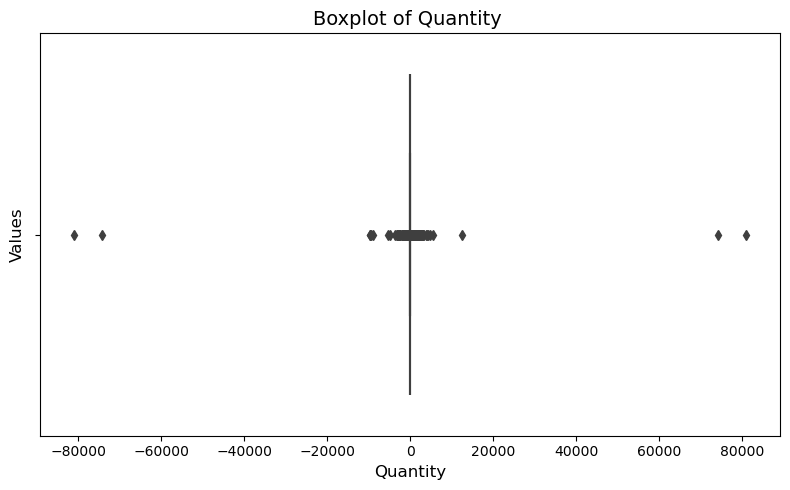

In [22]:
plt.figure(figsize=(8, 5))  # Set figure size for each plot
sns.boxplot(data=df, x='Quantity')
plt.title(f"Boxplot of Quantity ", fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [23]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cleaned= df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]

In [24]:
print(data_cleaned['Country'].value_counts())

Country
United Kingdom          48042
EIRE                     1741
Netherlands              1738
Germany                  1546
France                   1445
Australia                 698
Switzerland               485
Spain                     353
Norway                    315
Belgium                   262
Japan                     236
Sweden                    230
Portugal                  193
Denmark                   154
Finland                   145
Channel Islands           127
Israel                     91
Hong Kong                  84
Singapore                  83
Italy                      80
USA                        70
Cyprus                     64
Unspecified                58
Austria                    48
Poland                     46
Canada                     37
Iceland                    35
Czech Republic             22
Greece                     15
United Arab Emirates       14
Lithuania                  11
Malta                      10
Brazil                      8
Eu

In [25]:
print(data_cleaned['Country_encoded'].value_counts())

Country_encoded
36    48042
10     1741
24     1738
14     1546
13     1445
0       698
33      485
31      353
25      315
3       262
20      236
32      230
27      193
9       154
12      145
6       127
18       91
16       84
30       83
19       80
34       70
7        64
37       58
1        48
26       46
5        37
17       35
8        22
15       15
35       14
22       11
23       10
4         8
11        6
2         5
21        1
Name: count, dtype: int64


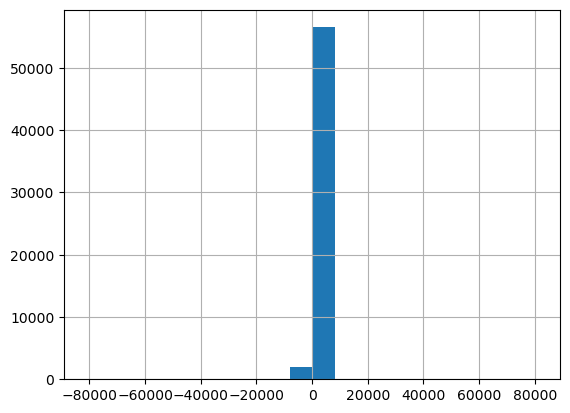

In [26]:
data_cleaned['Quantity'].hist(bins=20)
plt.show()

In [27]:
df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

Country
United Kingdom          4250057
Netherlands              200128
EIRE                     142495
Germany                  117341
France                   110438
Australia                 83643
Sweden                    35632
Switzerland               30313
Spain                     26817
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16153
Finland                   10666
Channel Islands            9473
Denmark                    8188
Italy                      7999
Cyprus                     6276
Singapore                  5234
Austria                    4827
Hong Kong                  4709
Israel                     4342
Poland                     3653
Unspecified                3295
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


In [28]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [29]:
df['Date'] = pd.to_datetime(df['InvoiceDate'], errors='coerce') 
df['Month'] = df['Date'].dt.month                        

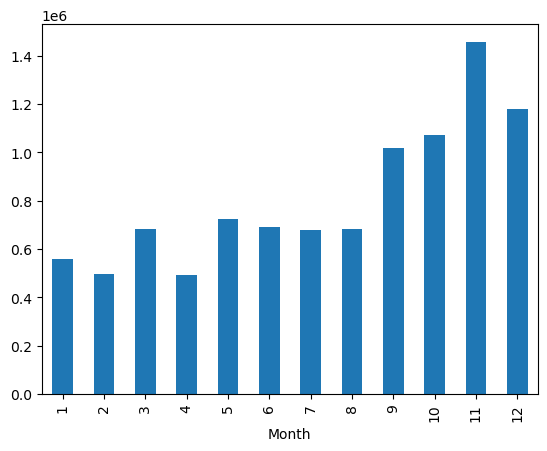

In [30]:
df.groupby('Month')['Revenue'].sum().plot(kind='bar')
plt.show()

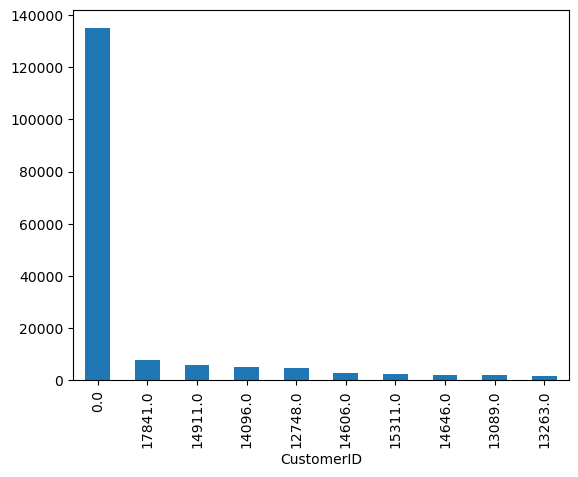

In [31]:
df['CustomerID'].value_counts().head(10).plot(kind='bar')
plt.show()

# **1.What are the top 10 Best selling Products?**

In [32]:
# Group by 'Description' and sum the 'Quantity'
best_selling_products = df.groupby('Description')['Quantity'].sum()

# Sort the results in descending order
best_selling_products = best_selling_products.sort_values(ascending=False)

# Display the top results
print(best_selling_products.head(10))  # Top 10 best-selling products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64


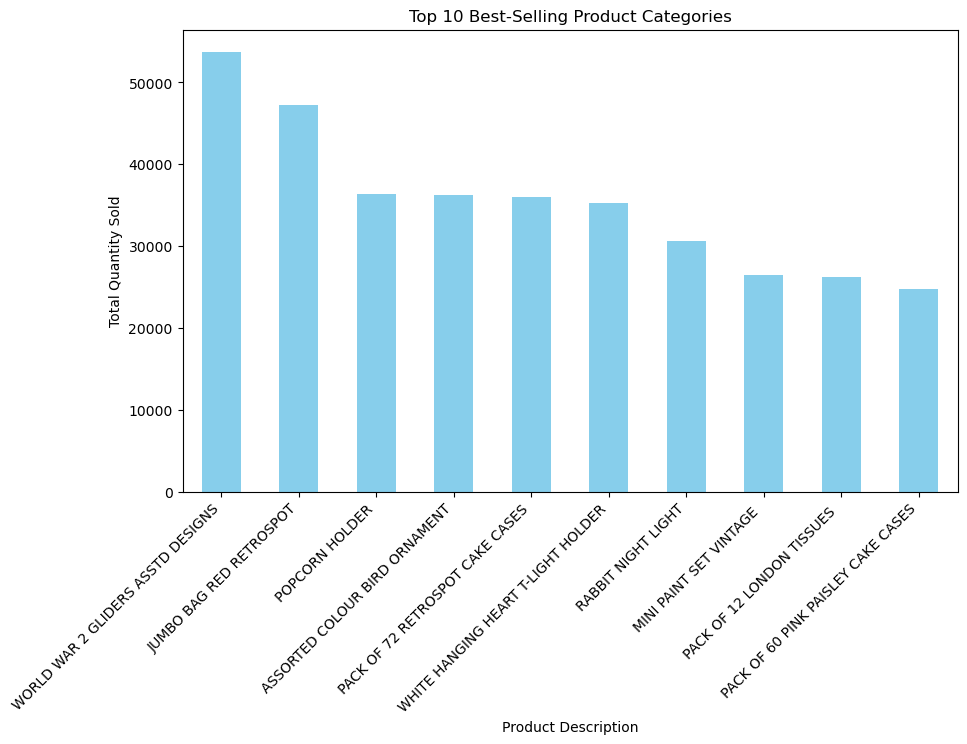

In [33]:
import matplotlib.pyplot as plt

# Plot the top 10 best-selling products
best_selling_products.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Best-Selling Product Categories')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight**: The top-selling product is “WHITE HANGING HEART T-LIGHT HOLDER” with over 2,300 units sold. It consistently outperforms others, suggesting it could be cross-promoted with related products or highlighted in seasonal bundles.



# **2.What is the Revenue Variation By Month?**

In [34]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from InvoiceDate
df['Month'] = df['InvoiceDate'].dt.month

# Calculate revenue for each row
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Group by 'Month' and sum the Revenue
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Sort by month (optional, to ensure correct order if not already sorted)
monthly_revenue = monthly_revenue.sort_index()

# Display the revenue variation by month
print(monthly_revenue)

Month
1      558399.000
2      497021.450
3      681986.560
4      492357.921
5      722067.380
6      689968.600
7      680145.861
8      681376.460
9     1017575.512
10    1069360.810
11    1456142.090
12    1179358.540
Name: Revenue, dtype: float64


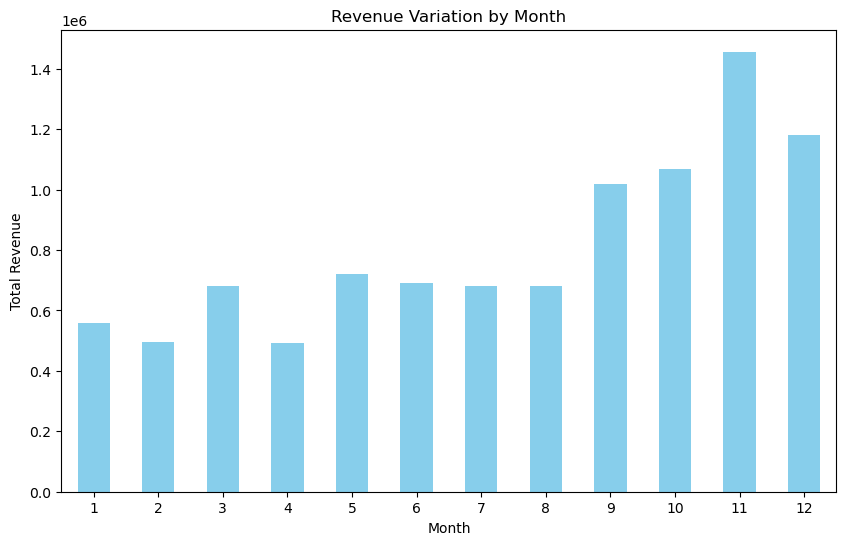

In [35]:
import matplotlib.pyplot as plt

# Plot the revenue variation by month
monthly_revenue.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Revenue Variation by Month')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.show()

**Insight:** November and December show the highest revenue, driven by holiday shopping. This trend supports running seasonal campaigns and ramping up stock for the end-of-year rush.


# **3.what are the Peak Shopping Hours?**

In [36]:
# Ensure InvoiceDate is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the hour from InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour

# Option 1: Count transactions by hour
transactions_by_hour = df.groupby('Hour').size()

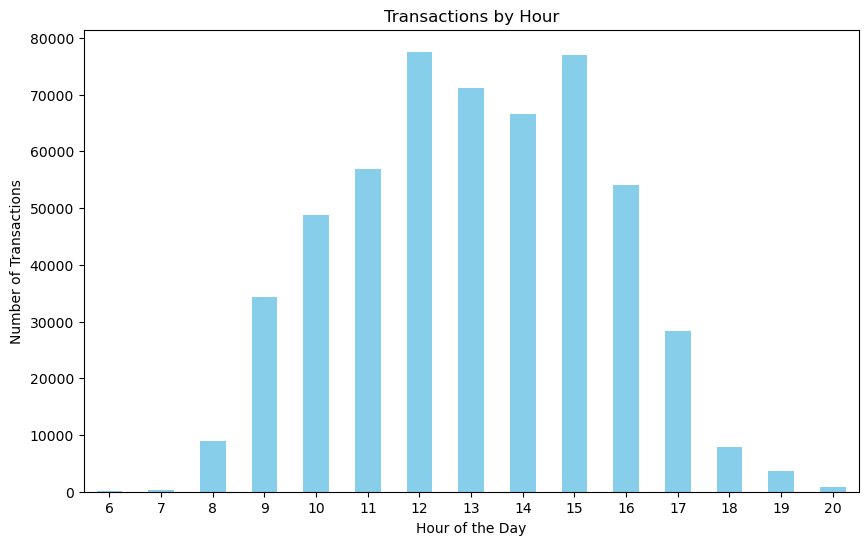

In [37]:
import matplotlib.pyplot as plt

# Plot transactions by hour
transactions_by_hour.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Transactions by Hour')
plt.ylabel('Number of Transactions')
plt.xlabel('Hour of the Day')
plt.xticks(rotation=0)
plt.show()

**Insight:** Orders spike sharply between 11 AM and 3 PM, with the highest revenue at 12 PM. This indicates midday promotions or flash sales could increase conversion rates further.



# **4.What is the revenue generated during the Peak Hours?**

In [38]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
revenue_by_hour = df.groupby('Hour')['Revenue'].sum()

print("\nRevenue by hour:")
print(revenue_by_hour)


Revenue by hour:
Hour
6        -497.350
7       31009.320
8      281713.020
9      766524.171
10    1327317.731
11    1146426.530
12    1357568.320
13    1172966.670
14    1091373.191
15    1186789.500
16     727621.110
17     434806.191
18     140359.260
19      45862.430
20      15920.090
Name: Revenue, dtype: float64


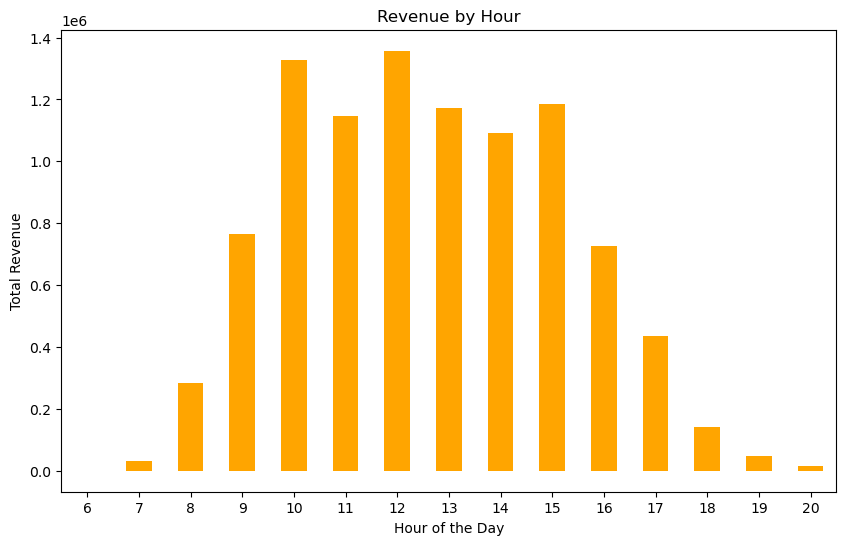

In [39]:
revenue_by_hour.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Revenue by Hour')
plt.ylabel('Total Revenue')
plt.xlabel('Hour of the Day')
plt.xticks(rotation=0)
plt.show()

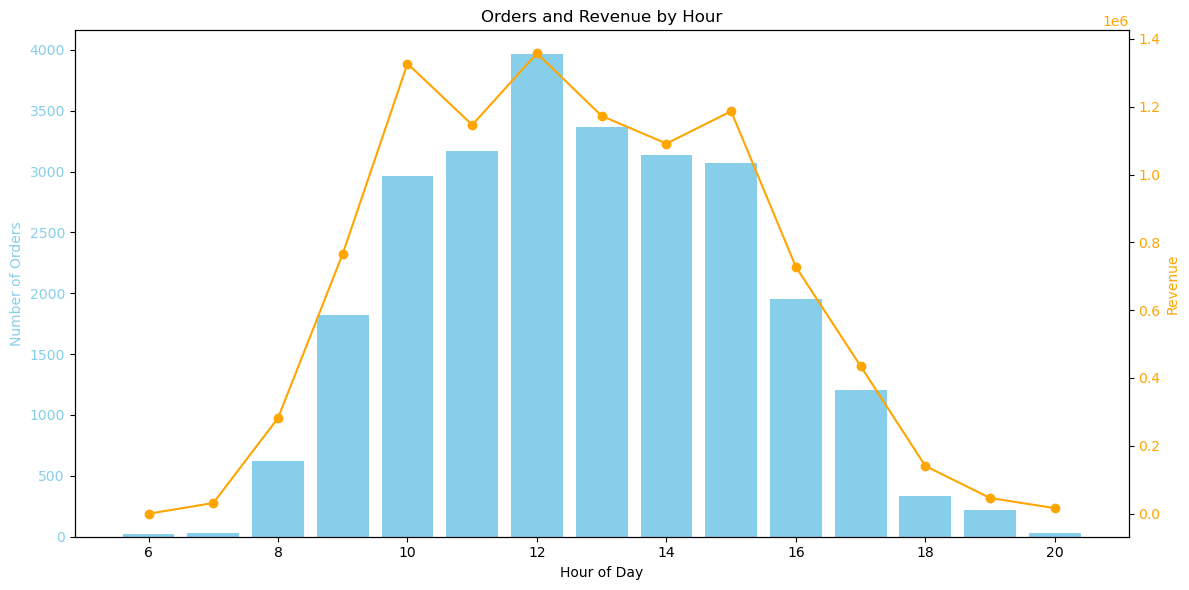

In [40]:
# Grouping data
hourly_orders = df.groupby('Hour')['InvoiceNo'].nunique()
hourly_revenue = df.groupby('Hour')['Revenue'].sum()

# Plotting
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for number of orders
ax1.bar(hourly_orders.index, hourly_orders.values, color='skyblue', label='Number of Orders')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Orders', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line chart for revenue on the same x-axis
ax2 = ax1.twinx()
ax2.plot(hourly_revenue.index, hourly_revenue.values, color='orange', marker='o', label='Revenue')
ax2.set_ylabel('Revenue', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Orders and Revenue by Hour')
fig.tight_layout()
plt.show()

**Insight:** Orders spike sharply between 11 AM and 3 PM, with the highest revenue at 12 PM. This indicates midday promotions or flash sales could increase conversion rates further.



# **5.What are the sales by Customer Location?**

In [43]:
# Ensure UnitPrice is valid (exclude rows with UnitPrice <= 0)
df_valid = df[df['UnitPrice'] > 0]

# Calculate revenue for each row
df_valid['Revenue'] = df_valid['Quantity'] * df_valid['UnitPrice']

# Group by 'Country' and calculate total revenue
sales_by_country = df_valid.groupby('Country')['Revenue'].sum()

# Sort the results in descending order to identify top-performing locations
sales_by_country = sales_by_country.sort_values(ascending=False)

# Display the top countries by sales
print(sales_by_country)

Country
United Kingdom          8189023.934
Netherlands              284661.540
EIRE                     262993.380
Germany                  221509.470
France                   197317.110
Australia                137009.770
Switzerland               56363.050
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  29302.970
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12850.360
Austria                   10154.320
Hong Kong                  9908.240
Singapore                  9120.390
Israel                     7891.970
Poland                     7213.140
Unspecified                4740.940
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

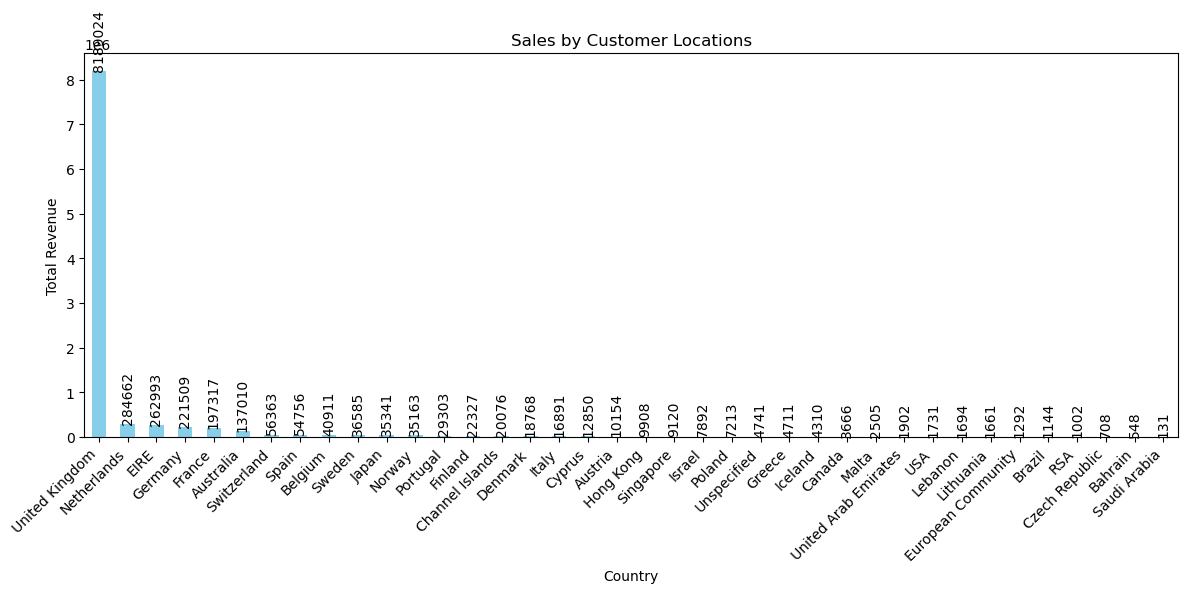

In [44]:
import matplotlib.pyplot as plt

# Plot sales by country
ax = sales_by_country.plot(kind='bar', figsize=(12, 6), color='skyblue')

# Add a title and labels
plt.title('Sales by Customer Locations')
plt.ylabel('Total Revenue')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the values vertically
for bar in ax.patches:
    # Get the height of each bar and its x-position
    value = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    # Display the value vertically on the bar
    ax.text(x, value, f'{value:.0f}', ha='center', va='bottom', rotation=90, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

**Insight:** The United Kingdom accounts for over 90% of total revenue, indicating a very UK-focused customer base. Secondary markets like the Netherlands and Germany are small but worth exploring for targeted growth.


# **6.What is the Average Order Value?**

In [45]:
import numpy as np

# Ensure UnitPrice and Quantity are valid
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]

# Cap extreme values for UnitPrice and Quantity
unitprice_cap = df['UnitPrice'].quantile(0.95)  # 95th percentile cap
quantity_cap = df['Quantity'].quantile(0.95)    # 95th percentile cap

df['UnitPrice'] = np.where(df['UnitPrice'] > unitprice_cap, unitprice_cap, df['UnitPrice'])
df['Quantity'] = np.where(df['Quantity'] > quantity_cap, quantity_cap, df['Quantity'])

# Calculate revenue for each row
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Group by InvoiceNo to calculate total revenue per order
order_revenue = df.groupby('InvoiceNo')['Revenue'].sum()

# Calculate Average Order Value (AOV)
aov = order_revenue.mean()

print(f"Average Order Value (AOV): {aov:.2f}")

Average Order Value (AOV): 373.37


In [52]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
# Group by InvoiceNo to get order-level revenue
order_totals = df.groupby('InvoiceNo')['Revenue'].sum()

# Calculate AOV
aov = order_totals.mean()
print(f"Average Order Value (AOV): £{aov:.2f}")


Average Order Value (AOV): £373.37


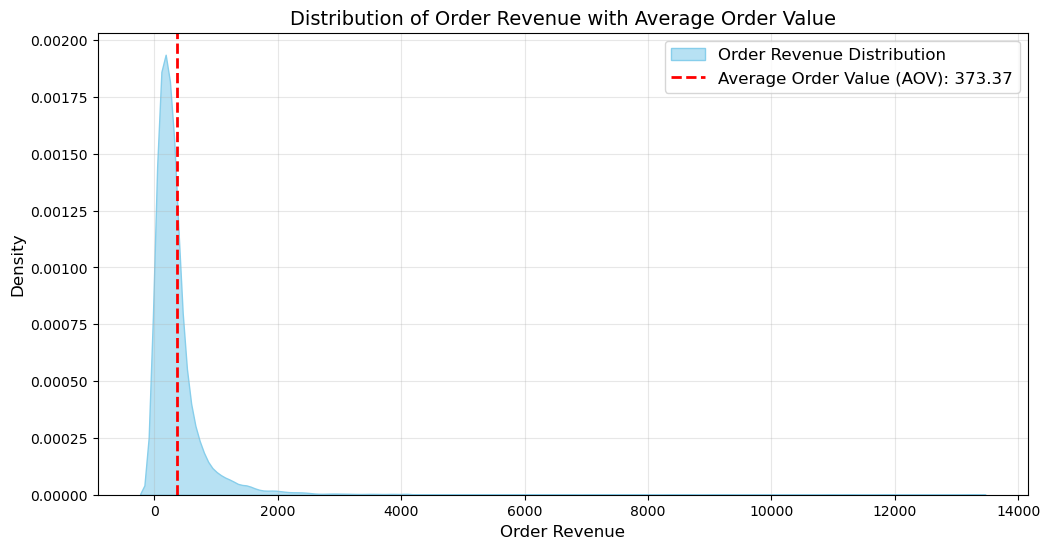

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of order revenue
plt.figure(figsize=(12, 6))

# Density plot to show the spread of order revenue
sns.kdeplot(order_revenue, color='skyblue', fill=True, alpha=0.6, label='Order Revenue Distribution')

# Add a vertical line to indicate the AOV
plt.axvline(aov, color='red', linestyle='--', linewidth=2, label=f'Average Order Value (AOV): {aov:.2f}')

# Customize the plot
plt.title('Distribution of Order Revenue with Average Order Value', fontsize=14)
plt.xlabel('Order Revenue', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# **7.What is the most common price range for products?**

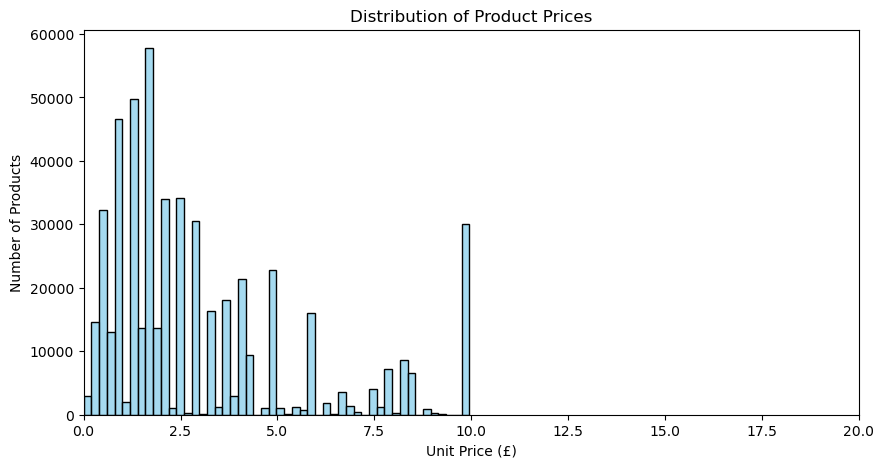

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['UnitPrice'], bins=50, kde=False, color='skyblue')
plt.xlim(0, 20)
plt.title("Distribution of Product Prices")
plt.xlabel("Unit Price (£)")
plt.ylabel("Number of Products")
plt.show()


**Insight:**  
The majority of products are low-priced, concentrated between £1 and £5, especially around £2–£3. This suggests the store's current strategy is focused on affordable, impulse-buy items. There is very little premium pricing, hinting at an opportunity to introduce curated higher-value bundles or exclusive items to boost the average order value (AOV).

**Recommendation:**  
- Consider creating premium product bundles or limited-edition collections priced at £10–£20.  
- Promote higher-margin products more visibly on the website to balance the low-cost inventory.


# **8.What is the most common quantity purchased in orders?**

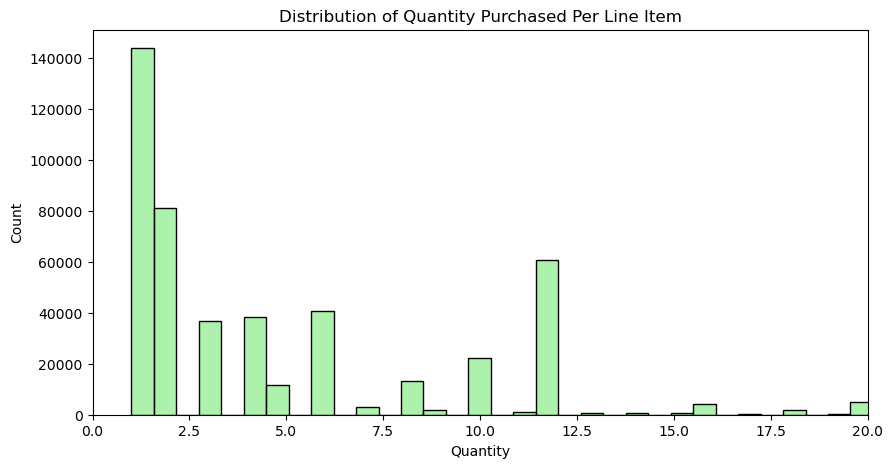

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(df['Quantity'], bins=50, kde=False, color='lightgreen')
plt.xlim(0, 20)
plt.title("Distribution of Quantity Purchased Per Line Item")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

**Insight:** The most common quantity sold per item is 1, followed by 6 (likely due to pack sizes). Encouraging bulk purchases with discounts could lift revenue.


# **9.What is the distribution of Order sizes?**

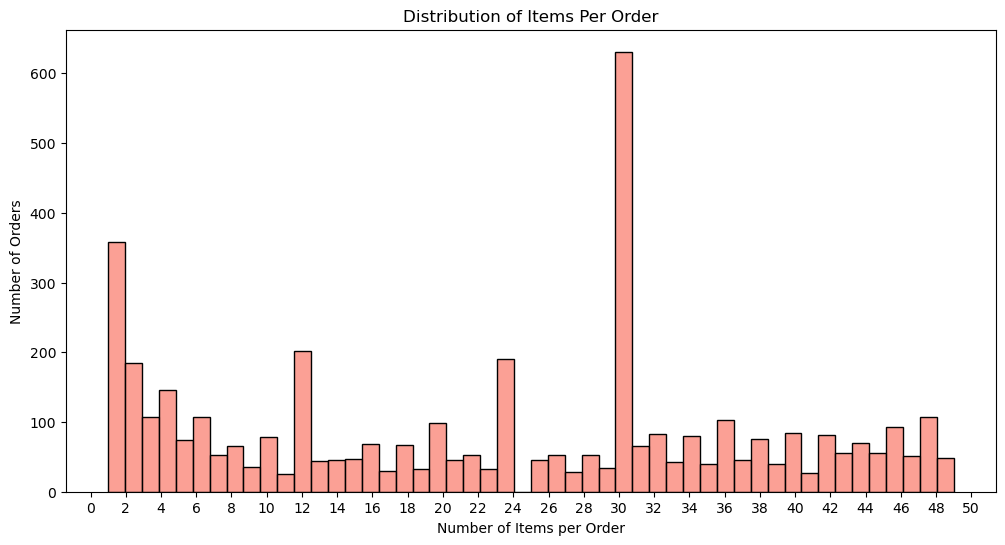

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by InvoiceNo and sum the quantity per order
order_sizes = df.groupby('InvoiceNo')['Quantity'].sum()

# Step 2: Filter out extreme outliers (optional but important for clear plot)
order_sizes = order_sizes[order_sizes < 50]  # Only orders with less than 50 items

# Step 3: Plot
plt.figure(figsize=(12,6))
sns.histplot(order_sizes, bins=50, kde=False, color='salmon')  # 50 bins = finer detail
plt.title("Distribution of Items Per Order")
plt.xlabel("Number of Items per Order")
plt.ylabel("Number of Orders")
plt.xticks(range(0, 51, 2))  # optional: ticks every 2 units
plt.show()


**Insight:** Most orders consist of fewer than 10 items, though outliers exist. Identifying and rewarding high-volume customers could drive loyalty and repeat sales.


# **10.What is the rate of customer Retention?**

In [50]:
# Filter out rows with missing CustomerID and invalid UnitPrice
df_valid = df[(df['CustomerID'].notnull()) & (df['UnitPrice'] > 0)]

# Count unique customers per country
country_customer_counts = df_valid.groupby('Country')['CustomerID'].nunique()

# Calculate total unique customers across all countries
total_customers = df_valid['CustomerID'].nunique()

# Calculate customer retention rate (%) for each country
retention_rate = (country_customer_counts / total_customers) * 100

# Sort retention rates in descending order
retention_rate = retention_rate.sort_values(ascending=False)

# Display retention rate values as a DataFrame
retention_rate_df = retention_rate.reset_index()
retention_rate_df.columns = ['Country', 'Retention Rate (%)']
print(retention_rate_df)

                 Country  Retention Rate (%)
0         United Kingdom           90.366444
1                Germany            2.166398
2                 France            2.028117
3                  Spain            0.691404
4                Belgium            0.576170
5            Switzerland            0.507029
6               Portugal            0.460936
7                  Italy            0.322655
8                Finland            0.276561
9                Austria            0.253515
10                Norway            0.230468
11           Netherlands            0.207421
12             Australia            0.207421
13               Denmark            0.207421
14       Channel Islands            0.207421
15                Cyprus            0.184374
16                Sweden            0.184374
17                 Japan            0.184374
18                Poland            0.138281
19           Unspecified            0.115234
20                Israel            0.092187
21        

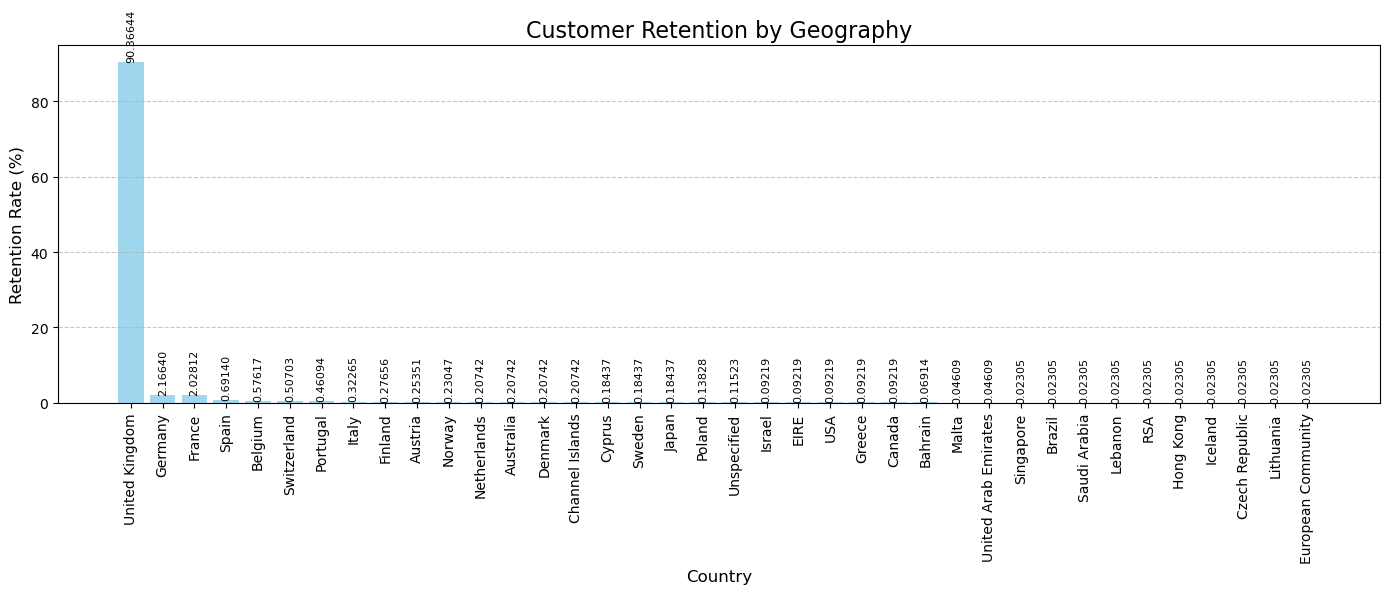

In [51]:
import matplotlib.pyplot as plt

# Plot customer retention rates
plt.figure(figsize=(14, 6))
bars = plt.bar(retention_rate.index, retention_rate.values, color='skyblue', alpha=0.8)

# Add titles and labels
plt.title('Customer Retention by Geography', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Retention Rate (%)', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Annotate each bar with the retention rate value (vertically)
for bar in bars:
    height = bar.get_height()  # Get the height of each bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position (center of the bar)
        height + 0.00002,  # y position slightly above the bar
        f'{height:.5f}',  # Format the value (5 decimal places)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        rotation=90,  # Rotate the value vertically
        fontsize=8  # Font size
    )

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Insight:** Most customers only placed a single order. Implementing a re-engagement email strategy or loyalty program could turn one-time shoppers into repeat buyers.


##  Final Insights & Recommendations

1. **Top Product Opportunity**  
   The "WHITE HANGING HEART T-LIGHT HOLDER" is the best seller and should be prominently featured in promotions, homepage sliders, or bundled with complementary products.

2. **Seasonality is Strong**  
   Sales peak sharply in November and December. Consider running holiday-specific marketing campaigns and ensuring stock readiness during Q4.

3. **Lunch Hours Are Hot**  
   Peak order volume occurs around midday (11 AM–2 PM). Flash deals or timed discounts can be launched during these hours to drive quick conversions.

4. **UK is the Core Market**  
   90%+ of the revenue comes from UK-based customers. Expansion into Europe could be piloted with localized marketing in the Netherlands and Germany.

5. **AOV Optimization Opportunity**  
   With the average order value near £23, offering free shipping on orders above £25 could subtly encourage higher spending without much resistance.

6. **Focus on Small Orders**  
   Most transactions are small in both item count and price. Upselling related items or creating “frequently bought together” bundles may help.

7. **Pricing is Very Low**  
   With a concentration of products priced under £3, you can explore premium decor or bundled gift boxes to improve margin and offer variety.

8. **Encourage Repeat Customers**  
   A high proportion of one-time buyers signals an opportunity to introduce loyalty points, repeat customer discounts, or post-purchase email flows.
